In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# PMT Operating Voltage

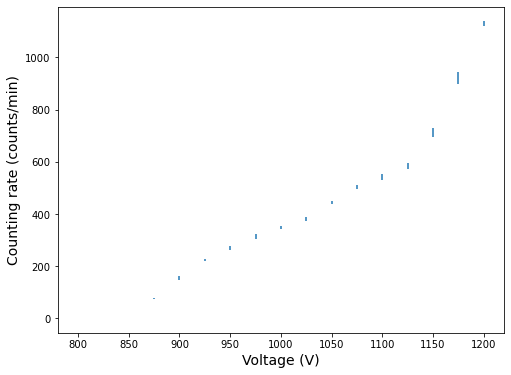

Text(0, 0.5, 'Counting rate/Voltage (counts/min)/V')

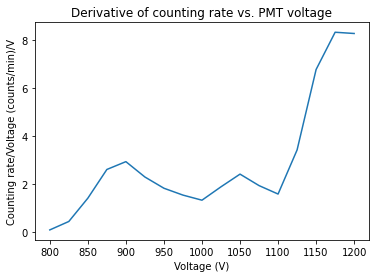

In [8]:
rates = [1.75,4.333333333,24.5,75.6,155.6,223,271,315,348.7,382.1,443.7,503.5,541.2,583.4,713,922.8,1130]
errs = [0.3285643703,0.7106690545,1.069551024,2.481934729,7.978721702,4.538722287,7.443117626,9.869143833,4.521676189,7.773816452,6.055392454,6.869012544,10.27488848,12.62774723,17.31184566,23.02911201,8.08084154]
vmax = len(rates)*25+800
voltages = list(range(800,vmax,25))
fig0,ax0 = plt.subplots(figsize=(8,6))
ax0.errorbar(voltages,rates,yerr=errs,ls='')
#ax0.set_title('Counter circuit counting rate vs. PMT voltage')
ax0.set_xlabel('Voltage (V)',fontsize=14)
ax0.set_ylabel('Counting rate (counts/min)',fontsize=14)
plt.show()

derivatives = np.gradient(rates,25)
fig1,ax1 = plt.subplots()
ax1.plot(voltages,derivatives)
ax1.set_title('Derivative of counting rate vs. PMT voltage')
ax1.set_xlabel('Voltage (V)')
ax1.set_ylabel('Counting rate/Voltage (counts/min)/V')

# Muon Lifetime Least Squares Regression

In [9]:
t = np.array([3.937E-07,1.45E-06,2.22E-06,3.18E-06,4.00E-06,4.79E-06,5.59E-06])
ni = np.array([6747.5,3341.2,2606.5,1504.9,1045.8,832.5])

dt = np.array([9.609E-10,4.65E-08,6.15E-08,7.62E-08,8.69E-08,9.62E-08,1.05E-07])
dni = np.array([82.14,130.13,151.46,164.66,172.39,177.91])

def find_t_avg(t,lam):
    t_avg = []
    for i in range(len(t)-1):
        ti_avg = (t[i]+t[i+1])/2-(lam/12)*(t[i+1]-t[i])**2
        t_avg.append(ti_avg)
    return t_avg

def find_dt_avg(t,dt,lam):
    dt_avg = []
    for i in range(len(t)-1):
        dti_avg = np.sqrt( ((0.5-(lam/6)*(t[i]-t[i+1]))*(dt[i]))**2 + ((0.5-(lam/6)*(t[i+1]-t[i]))*(dt[i+1]))**2 )
        dt_avg.append(dti_avg)
    return dt_avg

lam = 587484.10691991
t_avg = find_t_avg(t,lam)
dt_avg = find_dt_avg(t,dt,lam)

print(t_avg)
print(dt_avg)

[8.672252533451704e-07, 1.8059733894172655e-06, 2.654881220588551e-06, 3.557081307208921e-06, 4.364445930739273e-06, 5.158667514297604e-06]
[1.844977779849802e-08, 3.7386854969658267e-08, 4.787091881501921e-08, 5.731932532356135e-08, 6.457825822552782e-08, 7.110274291433816e-08]


In [10]:
def N(t,N0,l):
    return N0*np.e**(-l*t)

def find_fit(t_avg, ni, dni):
    popt, pcov = curve_fit(N, t_avg, ni, sigma=dni)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    
    N0 = popt[0]
    l = popt[1]
    
    return popt, perr, N0, l

popt, perr, N0, l = find_fit(t_avg, ni, dni)

t_above = [8.842E-07,1.84E-06,2.71E-06,3.501E-06,4.300E-06,5.088E-06]
t_below = [8.472E-07,1.77E-06,2.61E-06,3.615E-06,4.429E-06,5.231E-06]
po1, pe1, N0_above, l_above = find_fit(t_above, ni, dni)
po2, pe2, N0_below, l_below = find_fit(t_below, ni, dni)

t = np.linspace(0,6*10**(-6))
central_fit = N(t,N0,l)
above_fit = N(t,N0_above,l_above)
below_fit = N(t,N0_below,l_below)

[ 11113.04898671 587503.00170163] [  686.47749566 51882.87071378]
[ 11231.42533484 586877.22311888] [  661.49531292 48647.20348241]
[ 10961.83041293 586722.91340535] [  717.92578473 56036.91573994]


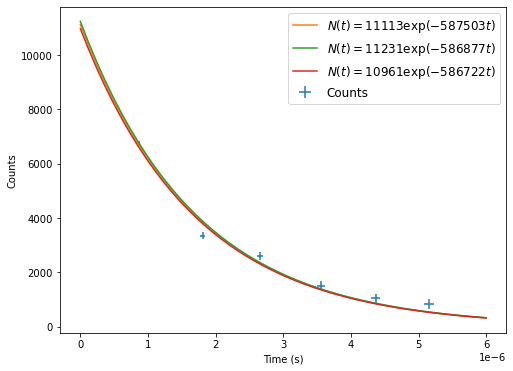

In [11]:
def rnd(a):
    return int(round(a,1))

fig2,ax2 = plt.subplots(figsize=(8,6))
ax2.errorbar(t_avg, ni, xerr=dt_avg, yerr=dni, ls='', label='Counts')
plt.plot(t, central_fit, label=r'$N(t)='+f'{rnd(N0)}'+r'\exp(-'+f'{rnd(l)}'+r't)$')
plt.plot(t, above_fit, label=r'$N(t)='+f'{rnd(N0_above)}'+r'\exp(-'+f'{rnd(l_above)}'+r't)$')
plt.plot(t, below_fit, label=r'$N(t)='+f'{rnd(N0_below)}'+r'\exp(-'+f'{rnd(l_below)}'+r't)$')
#ax2.set_title('Counts vs. Time')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Counts')
plt.legend(prop={'size':12})